In [1]:
import os
import pickle

import numpy as np
import pandas as pd

In [2]:
tb_user_curriculum_lecture_unit_solve = pd.read_csv("tables/tb_user_curriculum_lecture_unit_solve.csv")

tb_problems = pd.read_csv("tables/tb_problems.csv")

tb_curriculum_unit = pd.read_csv("tables/tb_curriculum_unit.csv")

In [3]:
difficulty2duration = {
    1.0: 0.75,
    2.0: 1,
    3.0: 1.5,
    4.0: 2.5,
    5.0: 4.5,
    6.0: 9,
    7.0: 10,
}
difficulty2duration = {k: v * 60 for k, v in difficulty2duration.items()}

In [4]:
df = tb_user_curriculum_lecture_unit_solve.merge(tb_problems).sort_values("seq").reset_index(drop=True)
df = df[df.notnull()["category3"]].reset_index(drop=True)

In [5]:
df

,seq,cunitSeq,userSeq,question_id,answer,isCorrect,duration,regdate,difficulty_cd,category1,category2,category3,category4,category5
0,2,1718,6,988,2,N,280,2021-04-01 00:00:00,1.0,1 다항식,01 다항식의 연산,01 다항식의 연산,[1] 다항식의 덧셈과 뺄셈,[유형 01 1] 다항식의 덧셈과 뺄셈
1,3,1723,6,29,2,N,112,2021-04-01 00:00:00,3.0,1 다항식,01 다항식의 연산,02 다항식의 곱셈공식,[5] 곱셈 공식의 변형-문자가 2개,[유형 06 1] 문자가 2개인 곱셈 공식의 변형
2,6,1738,6,304,1,N,123,2021-04-01 00:00:00,2.0,2 방정식과 부등식,05 이차방정식,03 이차방정식의 근과 계수의 관계,[8] 근과 계수의 관계를 이용하여 식의 값 구하기(1),[유형 09 1] 식의 값 구하기-근과 계수의 관계 이용
3,7,1738,6,305,4,Y,234,2021-04-01 00:00:00,3.0,2 방정식과 부등식,05 이차방정식,03 이차방정식의 근과 계수의 관계,[9] 근과 계수의 관계를 이용하여 식의 값 구하기(2),"[유형 10 1] 식의 값 구하기-근과 계수의 관계,이차방정식의 해 이용"
4,10,1721,6,13164,③,N,6,2021-04-02 15:44:34,2.0,1 다항식,01 다항식의 연산,02 다항식의 곱셈공식,[3] 곱셈 공식을 이용한 다항식의 전개,[유형 04 1] 곱셈 공식을 이용한 다항식의 전개
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235391,235490,359698,10731,2347,④,Y,77,2022-05-16 13:25:56,2.0,1 다항식,01 다항식의 연산,03 다항식의 나눗셈,[12] 조립제법,[유형 14 1] 조립제법 - 다항식 x+a로 나누는 경우
235392,235491,359698,10731,2346,④,Y,32,2022-05-16 13:26:30,2.0,1 다항식,01 다항식의 연산,03 다항식의 나눗셈,[12] 조립제법,[유형 14 1] 조립제법 - 다항식 x+a로 나누는 경우
235393,235492,359698,10731,55,7,Y,66,2022-05-16 13:27:38,2.0,1 다항식,01 다항식의 연산,03 다항식의 나눗셈,[12] 조립제법,[유형 14 1] 조립제법 - 다항식 x+a로 나누는 경우
235394,235493,359698,10731,1065,19,Y,33,2022-05-16 13:28:13,2.0,1 다항식,01 다항식의 연산,03 다항식의 나눗셈,[12] 조립제법,[유형 14 1] 조립제법 - 다항식 x+a로 나누는 경우


In [6]:
tb_curriculum_unit

,cunitSeq,currSeq,unitSeq,userSeq,cuOrder,studyDay,status,problemDuration,videoDuration,unitDuration,regdate,moddate,isUnit1Test
0,42193,286,10838,127,1,20210720.0,C,630,509,1139,2021-07-20 20:34:46,2021-07-20 20:34:46,N
1,42194,286,10839,127,2,20210720.0,C,270,0,270,2021-07-20 20:34:46,2021-07-20 20:34:46,N
2,42195,286,10840,127,3,20210720.0,C,540,0,540,2021-07-20 20:34:46,2021-07-20 20:34:46,N
3,42196,286,10841,127,4,20210720.0,P,360,0,360,2021-07-20 20:34:46,2021-07-20 20:34:46,N
4,42197,286,10842,127,5,20210720.0,C,720,0,720,2021-07-20 20:34:46,2021-07-20 20:34:46,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140577,374143,4251,38615,9145,5,20220520.0,N,1440,191,1631,2022-05-17 11:05:54,2022-05-17 11:05:54,N
140578,374144,4251,38616,9145,1,20220521.0,N,900,335,1235,2022-05-17 11:05:54,2022-05-17 11:05:54,N
140579,374145,4251,38617,9145,2,20220521.0,N,720,0,720,2022-05-17 11:05:55,2022-05-17 11:05:55,N
140580,374146,4251,38618,9145,3,20220521.0,N,900,255,1155,2022-05-17 11:05:56,2022-05-17 11:05:56,N


In [7]:
df = df.merge(tb_curriculum_unit[["cunitSeq", "currSeq", "isUnit1Test"]]).sort_values("seq").reset_index(drop=True)

In [8]:
df

,seq,cunitSeq,userSeq,question_id,answer,isCorrect,duration,regdate,difficulty_cd,category1,category2,category3,category4,category5,currSeq,isUnit1Test
0,9668,42321,404,3876,1,N,32,2021-07-20 22:45:39,1.0,3 경우의 수,07 경우의 수와 순열,01 경우의 수,[1] 합의 법칙,[유형 01 1] 합의 법칙,289,N
1,9669,42321,404,3877,2,N,12,2021-07-20 22:45:51,1.0,3 경우의 수,07 경우의 수와 순열,01 경우의 수,[1] 합의 법칙,[유형 01 1] 합의 법칙,289,N
2,9670,42321,404,13979,11,N,28,2021-07-20 22:46:19,1.0,3 경우의 수,07 경우의 수와 순열,01 경우의 수,[1] 합의 법칙,[유형 01 1] 합의 법칙,289,N
3,9671,42321,404,4742,12,N,13,2021-07-20 22:46:33,1.0,3 경우의 수,07 경우의 수와 순열,01 경우의 수,[1] 합의 법칙,[유형 01 1] 합의 법칙,289,N
4,9672,42321,404,4743,3,Y,7,2021-07-20 22:46:40,1.0,3 경우의 수,07 경우의 수와 순열,01 경우의 수,[1] 합의 법칙,[유형 01 1] 합의 법칙,289,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224039,235490,359698,10731,2347,④,Y,77,2022-05-16 13:25:56,2.0,1 다항식,01 다항식의 연산,03 다항식의 나눗셈,[12] 조립제법,[유형 14 1] 조립제법 - 다항식 x+a로 나누는 경우,4305,N
224040,235491,359698,10731,2346,④,Y,32,2022-05-16 13:26:30,2.0,1 다항식,01 다항식의 연산,03 다항식의 나눗셈,[12] 조립제법,[유형 14 1] 조립제법 - 다항식 x+a로 나누는 경우,4305,N
224041,235492,359698,10731,55,7,Y,66,2022-05-16 13:27:38,2.0,1 다항식,01 다항식의 연산,03 다항식의 나눗셈,[12] 조립제법,[유형 14 1] 조립제법 - 다항식 x+a로 나누는 경우,4305,N
224042,235493,359698,10731,1065,19,Y,33,2022-05-16 13:28:13,2.0,1 다항식,01 다항식의 연산,03 다항식의 나눗셈,[12] 조립제법,[유형 14 1] 조립제법 - 다항식 x+a로 나누는 경우,4305,N


In [9]:
u_list = np.unique(df["userSeq"].values)

In [10]:
cunit_list = np.unique(tb_curriculum_unit["cunitSeq"].values)

In [11]:
u_list.shape

(493,)

In [117]:
def get_achievement_score(R, TR):
#     if R < 0.5:
#         AS = 0.7 * R
#     else:
#         AS = 0.7 * R + 0.3 * ((-1) * np.minimum(TR - 0.5, 0) / 0.5) - 0.3 * (np.maximum(TR - 1.5, 0) / 0.5)
    
    AS = 0.7 * R + 0.3 * (1.5 - np.minimum(np.maximum(TR, 0.5), 1.5))
    
    return AS


# temp = 305
temp = 20
for u in u_list[temp:temp + 1]:
    df_u = df[df["userSeq"] == u]
    
    print("-----------------------------------------------------------------------------")
    print(u)
    
    _, indices = np.unique(df_u["currSeq"].values, return_index=True)
    curr_list_ = np.array([df_u["currSeq"].values[idx] for idx in sorted(indices)])
    for curr in curr_list_:
        df_curr = df_u[df_u["currSeq"] == curr]
        df_curr = df_curr[df_curr["isUnit1Test"] == "N"]
        
        print("=====================================")
        print(curr)
        
        _, indices = np.unique(df_curr["category2"].values, return_index=True)
        c2_list = np.array([df_curr["category2"].values[idx] for idx in sorted(indices)])

        for c2 in c2_list:
            df_c2 = df_curr[df_curr["category2"] == c2]

            R = np.mean(df_c2["isCorrect"] == "Y")

            T = np.sum(df_c2["duration"].values)
            T_hat = np.sum([difficulty2duration[d] for d in df_c2["difficulty_cd"].values])

            TR = np.minimum(2.0, T / T_hat)

            difficulty_mean = np.mean(df_c2["difficulty_cd"].values)

            achievement_score = get_achievement_score(R, TR)

            print("------------------------------")
            print(c2)
            print("difficulty_mean: {}".format(difficulty_mean))
            print("R: {}".format(R))
            print("TR: {}".format(TR))
#             print("achievement_score: {}".format(achievement_score))

-----------------------------------------------------------------------------
432
298
------------------------------
01 다항식의 연산
difficulty_mean: 1.2176470588235293
R: 0.9294117647058824
TR: 2.0
------------------------------
02 항등식과 나머지정리
difficulty_mean: 1.15
R: 0.88
TR: 2.0
------------------------------
03 인수분해
difficulty_mean: 1.2941176470588236
R: 0.9607843137254902
TR: 2.0
377
------------------------------
04 복소수
difficulty_mean: 1.2251655629139073
R: 0.9271523178807947
TR: 1.3638603696098563
------------------------------
05 이차방정식
difficulty_mean: 1.1388888888888888
R: 0.9513888888888888
TR: 1.3109144542772861
------------------------------
06 이차방정식과 이차함수
difficulty_mean: 1.290909090909091
R: 0.8545454545454545
TR: 1.2659300184162063
------------------------------
07 여러 가지 방정식
difficulty_mean: 1.1359223300970873
R: 0.9223300970873787
TR: 1.7495384615384615
------------------------------
08 연립일차부등식
difficulty_mean: 1.1724137931034482
R: 0.9080459770114943
TR: 0.9299516908212561


3086
------------------------------
09 수열의 합
difficulty_mean: 1.7692307692307692
R: 0.717948717948718
TR: 1.2479302832244008
3328
------------------------------
01 지수
difficulty_mean: 2.0454545454545454
R: 0.7727272727272727
TR: 1.0778947368421052
------------------------------
02 로그
difficulty_mean: 2.3684210526315788
R: 0.6842105263157895
TR: 1.2432624113475177
------------------------------
03 지수함수
difficulty_mean: 2.1666666666666665
R: 0.6333333333333333
TR: 0.9270983213429257
------------------------------
04 로그함수
difficulty_mean: 2.323529411764706
R: 0.7352941176470589
TR: 1.182435129740519
3525
------------------------------
02 로그
difficulty_mean: 2.9069767441860463
R: 0.4186046511627907
TR: 1.2966145833333333
3557
------------------------------
02 로그
difficulty_mean: 1.8333333333333333
R: 0.8571428571428571
TR: 0.6290196078431373
3594
------------------------------
05 삼각함수
difficulty_mean: 1.6
R: 0.8571428571428571
TR: 1.1252525252525252
------------------------------
06 삼각함수의 

-----------------------------------------------------------------------------
0 6
59
-----------------------------------------------------------------------------
1 127
21
-----------------------------------------------------------------------------
2 148
19
-----------------------------------------------------------------------------
3 192
10
-----------------------------------------------------------------------------
4 258
1
-----------------------------------------------------------------------------
5 292
2
-----------------------------------------------------------------------------
6 339
63
-----------------------------------------------------------------------------
7 346
1
-----------------------------------------------------------------------------
8 348
8
-----------------------------------------------------------------------------
9 359
41
-----------------------------------------------------------------------------
10 360
111
-----------------------------------------------

4
-----------------------------------------------------------------------------
133 798
2
-----------------------------------------------------------------------------
134 800
2
-----------------------------------------------------------------------------
135 805
12
-----------------------------------------------------------------------------
136 809
1
-----------------------------------------------------------------------------
137 817
1
-----------------------------------------------------------------------------
138 830
6
-----------------------------------------------------------------------------
139 833
2
-----------------------------------------------------------------------------
140 834
9
-----------------------------------------------------------------------------
141 901
1
-----------------------------------------------------------------------------
142 931
2
-----------------------------------------------------------------------------
143 935
32
----------------------------

1
-----------------------------------------------------------------------------
254 3405
20
-----------------------------------------------------------------------------
255 3429
4
-----------------------------------------------------------------------------
256 3478
4
-----------------------------------------------------------------------------
257 3495
12
-----------------------------------------------------------------------------
258 3557
1
-----------------------------------------------------------------------------
259 3576
6
-----------------------------------------------------------------------------
260 3577
24
-----------------------------------------------------------------------------
261 3580
10
-----------------------------------------------------------------------------
262 3581
35
-----------------------------------------------------------------------------
263 3582
8
-----------------------------------------------------------------------------
264 3583
6
--------------

1
-----------------------------------------------------------------------------
348 7472
2
-----------------------------------------------------------------------------
349 7485
1
-----------------------------------------------------------------------------
350 7515
15
-----------------------------------------------------------------------------
351 7534
3
-----------------------------------------------------------------------------
352 7577
1
-----------------------------------------------------------------------------
353 7622
1
-----------------------------------------------------------------------------
354 7715
1
-----------------------------------------------------------------------------
355 7895
8
-----------------------------------------------------------------------------
356 7924
1
-----------------------------------------------------------------------------
357 7931
33
-----------------------------------------------------------------------------
358 8037
1
-----------------

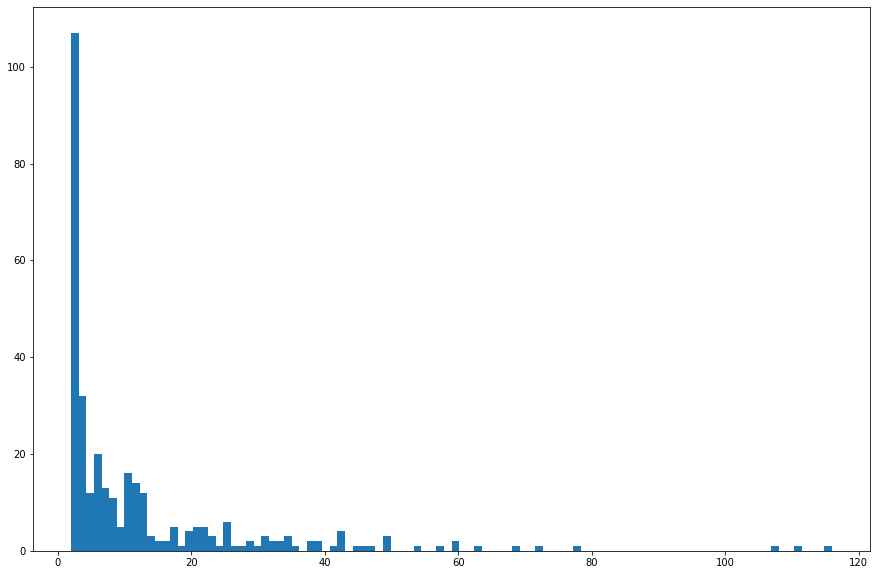

In [115]:
def get_achievement_score(R, TR):
#     if R < 0.5:
#         AS = 0.7 * R
#     else:
#         AS = 0.7 * R + 0.3 * ((-1) * np.minimum(TR - 0.5, 0) / 0.5) - 0.3 * (np.maximum(TR - 1.5, 0) / 0.5)
    
    AS = 0.7 * R + 0.3 * (1.5 - np.minimum(np.maximum(TR, 0.5), 1.5))
    
    return AS


seq_lens = []
for i, u in enumerate(u_list):
    df_u = df[df["userSeq"] == u]
    
    print("-----------------------------------------------------------------------------")
    print(i, u)
    
    _, indices = np.unique(df_u["currSeq"].values, return_index=True)
    curr_list_ = np.array([df_u["currSeq"].values[idx] for idx in sorted(indices)])
    
    seq_len = 0
    for curr in curr_list_:
        df_curr = df_u[df_u["currSeq"] == curr]
        df_curr = df_curr[df_curr["isUnit1Test"] == "N"]
        
        _, indices = np.unique(df_curr["category2"].values, return_index=True)
        c2_list = np.array([df_curr["category2"].values[idx] for idx in sorted(indices)])

        seq_len += len(c2_list)
        
    print(seq_len)
    if seq_len > 1:
        seq_lens.append(seq_len)

import matplotlib.pyplot as plt

plt.figure(figsize=[15, 10], facecolor="white")
plt.hist(seq_lens, bins=100)
plt.show()

In [103]:
np.unique(df[df["userSeq"] == 6]["category2"])

array(['01 다항식의 연산', '01 지수', '01 집합의 뜻과 표현', '02 집합의 연산',
       '02 항등식과 나머지정리', '03 명제', '03 원과 직선', '03 인수분해', '03 지수함수',
       '04 복소수', '04 원주각', '04 함수', '05 원과 부채꼴', '05 유리함수', '05 이차방정식',
       '06 무리함수', '06 이차방정식과 이차함수', '07 여러 가지 방정식', '08 등차수열과 등비수열',
       '08 연립일차부등식', '08 일차함수와 그 그래프', '09 이차부등식과 연립이차부등식',
       '09 일차함수와 일차방정식의 관계', '10 평면좌표', '11 직선의 방정식', '12 원의 방정식',
       '13 도형의 이동'], dtype=object)

In [ ]:
end

In [ ]:
def get_achievement_score(R, TR):
    if R < 0.5:
        AS = 0.7 * R
    else:
        AS = 0.7 * R + 0.3 * (-2) * np.minimum(TR - 0.8, 0)
    
    return AS


temp = 300
for u in u_list[temp:temp + 1]:
    df_u = df[df["userSeq"] == u]
    
    print("-----------------------------------------------------------------------------")
    print(u)

    cunit_list_ = np.unique(df_u["cunitSeq"].values)
    for cunit in cunit_list_[:]:
        df_cunit = df_u[df_u["cunitSeq"] == cunit]
        
        R = np.mean(df_cunit["isCorrect"] == "Y")

        T = np.sum(df_cunit["duration"].values)
#         T_hat = tb_curriculum_unit[tb_curriculum_unit["cunitSeq"] == cunit]["problemDuration"].values[0]
        T_hat = np.sum([difficulty2duration[d] for d in df_cunit["difficulty_cd"].values])
    
        TR = np.minimum(2.0, T / T_hat)
        
        achievement_score = get_achievement_score(R, TR)

        print("==========================================")
        print(cunit, np.unique(df_cunit["category4"].values))
        print(np.mean(df_cunit["difficulty_cd"].values))
        print(achievement_score)

In [ ]:
u_list

In [ ]:
df[df["userSeq"] == u_list[300]].iloc[:50]

In [74]:
df[df["difficulty_cd"] == 6.0]

,seq,cunitSeq,userSeq,question_id,answer,isCorrect,duration,regdate,difficulty_cd,category1,category2,category3,category4,category5,currSeq,isUnit1Test
37833,48019,77415,575,5267,65,Y,12,2021-08-20 17:57:48,6.0,1 집합과 명제,01 집합의 뜻과 표현,02 부분집합,[14] 특별한 조건이 있는 부분집합의 개수,[유형 16 3] 집합의 활용-부분집합 사이의 포함 관계를 이용하는 경우,569,N
37895,48081,77423,575,5319,127,Y,87,2021-08-20 18:18:45,6.0,1 집합과 명제,02 집합의 연산,01 집합의 연산,[9] 집합의 연산과 부분집합의 개수,[유형 08 1] 집합의 연산과 부분집합의 개수,569,N
43326,53576,87613,599,3739,④,Y,137,2021-08-25 15:15:55,6.0,2 함수,04 함수,04 역함수,[22] 역함수의 그래프의 성질,[유형 23 1] 역함수의 그래프의 성질,667,N
43448,53698,87615,599,5468,③,Y,646,2021-08-25 17:04:49,6.0,2 함수,04 함수,04 역함수,[23] 절댓값 기호를 포함한 식의 그래프,[유형 24 2] 절댓값 기호를 포함한 식의 그래프-절댓값 기호가 2개 이상인 경우,667,N
44181,54431,87621,599,3822,9,Y,142,2021-08-26 00:53:13,6.0,2 함수,05 유리함수,02 유리함수,[16] 유리함수의 그래프의 성질,[유형 19 2] 유리함수의 그래프의 성질-활용,667,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215702,227128,349376,10474,27765,⑥,N,81,2022-04-24 19:03:13,6.0,2 방정식과 부등식,05 이차방정식,03 이차방정식의 근과 계수의 관계,[13] 두 수를 근으로 하는 이차방정식,[유형 14 3] 두 수를 근으로 하는 이차방정식의 활용,4154,N
216106,227541,337829,10463,23574,48,N,160,2022-04-25 18:50:01,6.0,1 다항식,03 인수분해,01 인수분해,[13] 인수분해의 도형에의 활용,[유형 13 1] 인수분해의 도형에의 활용,4012,N
216107,227542,337829,10463,23576,82,N,133,2022-04-25 18:52:15,6.0,1 다항식,03 인수분해,01 인수분해,[13] 인수분해의 도형에의 활용,[유형 13 1] 인수분해의 도형에의 활용,4012,N
216195,227635,337814,10463,23637,④,Y,1020,2022-04-25 23:00:17,6.0,1 다항식,02 항등식과 나머지정리,02 나머지정리와 인수정리,[8] 나머지정리-이차식으로 나누는 경우,[유형 10 4] 나머지정리의 활용,4012,N
